In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sympy import *
from jupyterthemes import jtplot
import math
jtplot.style()

# Exercises

### 3.1 

$ \vec{x} = [x_1, x_2]^T$

$ \vec{y} = [y_1, y_2]^T$

Show that 

$\langle \vec{x}, \vec{y} \rangle := x_1y_1 - (x_1y_2 + x_2y_1) + 2(x_2y_2) $ is an inner product.

[Prove that a function is an inner product](https://math.stackexchange.com/questions/217486/prove-that-a-function-is-an-inner-product)


If you ever want to show something is an inner product, you need to show three things:

1. Symmetry:  ⟨𝑓,𝑔⟩=⟨𝑔,𝑓⟩ (Or, if the field is the complex numbers, ⟨𝑓,𝑔⟩=⟨𝑔,𝑓⟩, i.e. "conjugate symmetry.)

2. Linearity: ⟨𝛼𝑓,𝑔⟩=𝛼⟨𝑓,𝑔⟩. Notice this also implies ⟨𝑓,𝛼𝑔⟩=𝛼⟨𝑓,𝑔⟩ (𝛼 in the complex case) by symmetry.

3. Positive-definite: ⟨𝑓,𝑓⟩≥0 with equality if and only if 𝑓=0, the zero function.

How to solve  
1.  
show ⟨x,y⟩=⟨y,x⟩  
$⟨x,y⟩= 𝑥_1𝑦_1−(𝑥_1𝑦_2+𝑥_2𝑦_1)+2(𝑥_2𝑦_2)   $  
$ = y_1x_1−(y_1x_2+y_2x_1)+2(y_2x_2)  $
= ⟨y,x⟩


2.  
show ⟨Cx,y⟩= C⟨x,y⟩  
$ ⟨Cx,y⟩= C𝑥1𝑦1−(C𝑥1𝑦2+C𝑥2𝑦1)+2(C𝑥2𝑦2)   $  
$ = C𝑥1𝑦1− C(𝑥1𝑦2+𝑥2𝑦1)+2C(𝑥2𝑦2)   $  
$ = C(𝑥1𝑦1−(𝑥1𝑦2+𝑥2𝑦1)+2(𝑥2𝑦2)) $


3.  
show ⟨x,x⟩ > 0 except for x=0  
   
$ ⟨x,x⟩= 𝑥_1x_1−(𝑥_1x_2+𝑥_2x_1)+2(𝑥_2x_2) $  
$ = x_1^2 - 2x_1x_2 + 2x_2^2 $  
$ = (x_1 - x_2) ^2 + x_2^2 > 0 $  

⟨0,0⟩ =$ 0*0 − (0*0+0*0)+2*0 = 0 $


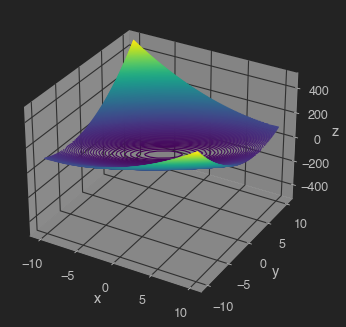

In [2]:
# 3D plot to visualize
def func(x1, x2):
    return x1**2 - 2*x1*x2 + 2*x2**2

x1 = np.linspace(-10, 10, 30)
x2 = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x1, x2)
Z = func(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 250)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d(-500,500)
plt.show()

### 3.2
Consider $ \mathbb{R}^2$ with $\langle *,*\rangle $ defined for all $\vec{x}, \vec{y}$ in $\mathbb{R}^2$ as

$\langle \vec{x}, \vec{y} \rangle : = x^T \begin{bmatrix}
2&0 \\
1&2 \end{bmatrix} y $

$ A = \begin{bmatrix}
2&0 \\
1&2 \end{bmatrix} $

is $\langle *,*\rangle $ an inner product?

In [3]:
# no, the matrix A is not symmetric
A = np.array([[2, 0], [1, 2]]).reshape(2, 2)
A

array([[2, 0],
       [1, 2]])

In [4]:
A.T

array([[2, 1],
       [0, 2]])

### 3.3
Compute the distance between $$ \vec{x} = \begin{bmatrix}
1 \\
2 \\
3 \end{bmatrix}, \vec{y} = \begin{bmatrix}
-1 \\
-1 \\
0 \end{bmatrix}  $$

using


a. $\langle \vec{x}, \vec{y} \rangle := x^Ty $

$ x - y = \begin{bmatrix}
1 - 2 \\
2 - 1 \\
3 - 0 \end{bmatrix}  = \begin{bmatrix}
-1 \\
1 \\
3 \end{bmatrix}$

$ d(\vec{x}, \vec{y}) := \sqrt{\langle x-y, x-y \rangle}  = \sqrt{\langle x-y, x-y \rangle}$


In [5]:
x = np.array([1, 2, 3]).reshape(3, 1)
y = np.array([-1, -1, 0]).reshape(3, 1)
x_y = x - y
inner_product = np.matmul(x_y.T, x_y)
dist = np.sqrt(inner_product)
print('inner product', inner_product)
print('distance', dist)

inner product [[22]]
distance [[4.69041576]]


<ipython-input-6-90f9644be8f8>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


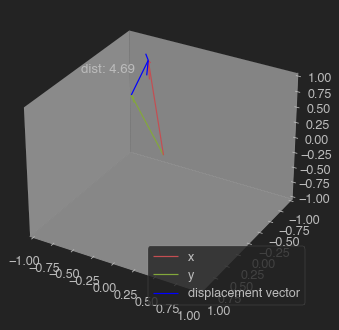

In [6]:
# plotting 
fig = plt.figure()
ax = fig.gca(projection = '3d')
scale3D = 1
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
origin  = np.array([0, 0, 0])
ax.grid(False)
# Figure setup.

colors = ["r","g"]
diff = x - y
ax.quiver(*origin,*x, length=1,color='r', label='x', arrow_length_ratio=0.1)
ax.quiver(*origin,*y, length=1,color='g', label='y', arrow_length_ratio=0.1)
ax.quiver(*y,*diff, length=1,color='blue', label='displacement vector',  arrow_length_ratio=0.1)
plt.annotate('dist: {:.2f}'.format(dist[0][0]), xy=[-0.05, 0.05])
plt.legend(loc='lower right')

b. $\langle \vec{x}, \vec{y} \rangle := x^TAy, A = \begin{bmatrix}
2&1&0 \\
1&3&-1 \\
0&-1&2 \end{bmatrix} $

In [7]:
A = np.array([[2, 1, 0], [1, 3, -1], [0, -1, 2]]).reshape(3, 3)

inner_product = np.matmul(x_y.T, np.matmul(A, x_y))
dist = np.sqrt(inner_product)
print('inner product',  inner_product)
print('distance',  dist)

inner product [[47]]
distance [[6.8556546]]


### 3.4 
Compute the angle between $$ \vec{x} = \begin{bmatrix}
1 \\
2 \end{bmatrix}, \vec{y} = \begin{bmatrix}
-1 \\
-1 \end{bmatrix}  $$

using


a. $\langle \vec{x}, \vec{y} \rangle := x^Ty $


$$
cos\omega = \frac{\langle x,y\rangle}{||x||* ||y||} = \frac{\langle x,y\rangle}{\sqrt{\langle x,x\rangle\langle y,y\rangle}} = \frac{x^Ty}{\sqrt{x^Txy^Ty}}
$$

The angle between the vectors is 2.82 radians or 161.57 degrees


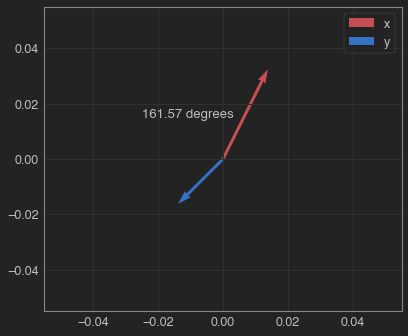

In [8]:
x = np.array([1, 2]).reshape(2, 1)
y = np.array([-1, -1]).reshape(2, 1)

def get_angle(x, y):
    """
    takes in two vectors of the same length and returns a tuple of the angle between them in radians and degrees.
    """
    inner_product = np.dot(x.T, y)
    vector_norms = np.sqrt(np.dot(x.T, x)*np.dot(y.T, y))
    cos_angle = inner_product / vector_norms
    radians = math.acos(cos_angle)
    degrees = radians * (180 / math.pi)
    print('The angle between the vectors is {:.2f} radians or {:.2f} degrees'.format(radians, degrees))
    return (radians, degrees)

radians, degrees = get_angle(x, y)

#plot vectors
origin = ([[0, 0], [0, 0]])
plt.quiver(*origin, *x, color=['r'], scale=8, label='x')
plt.quiver(*origin, *y, color='b', scale=8, label='y')
plt.annotate("{:.2f} degrees".format(degrees), xy=[-.025, 0.015])
plt.legend()
plt.show()

using


b. $\langle \vec{x}, \vec{y} \rangle := x^TBy, B := \begin{bmatrix}
2&1 \\
1&3 \end{bmatrix} $

In [9]:
# update our function so that it includes a transformation matrix
def get_angle(x, y, B = np.array([[1, 0], [0, 1]]).reshape(2, 2)):
    """
    takes in two vectors of the same length and a transformation matrix and returns a tuple of the angle between them in radians and degrees.
    Transformation matrix B is the stardanrd coordinate system by default. 
    """
    inner_product = np.dot(x.T, np.dot(B, y))
    vector_norms = np.sqrt(np.dot(x.T, np.dot(B, x))*np.dot(y.T, np.dot(B, y)))
    cos_angle = inner_product / vector_norms
    radians = math.acos(cos_angle)
    degrees = radians * (180 / math.pi)
    print('The angle between the vectors is {:.2f} radians or {:.2f} degrees'.format(radians, degrees))
    return (radians, degrees)

B = np.array([[2, 1], [1, 3]]).reshape(2, 2)
radians, degrees = get_angle(x, y, B)

The angle between the vectors is 2.94 radians or 168.51 degrees


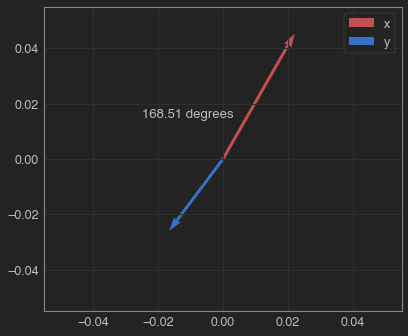

In [10]:
#plot vectors
new_x = np.dot(B, x)
new_y = np.dot(B, y)

origin = ([[0, 0], [0, 0]])
plt.quiver(*origin, *new_x, color=['r'], scale=20, label='x')
plt.quiver(*origin, *new_y, color='b', scale=20, label='y')
plt.annotate("{:.2f} degrees".format(degrees), xy=[-.025, 0.015])
plt.legend()
plt.show()

### 3.5

Consider the Euclidean vector space $ \mathbb{R}^5$ with the dot product. A subspace $ U \subseteq \mathbb{R}^5$ and x $\in \mathbb{R}^5 $ are given by
$$ U = span [ \begin{bmatrix}
0 \\
-1 \\
2 \\
0 \\
2 \end{bmatrix},  \begin{bmatrix}
1 \\
-3 \\
1 \\
-1 \\
2 \end{bmatrix}, \begin{bmatrix}
-3 \\
4 \\
1 \\
2 \\
1 \end{bmatrix}, \begin{bmatrix}
-1 \\
-3 \\
5 \\
0 \\
7 \end{bmatrix}], \mathbf{x} = \begin{bmatrix}
-1 \\
-9 \\
-1 \\
4 \\
1 \end{bmatrix}$$

a. Determine the orthogonal projection $ \pi_U(x) $ of $ \mathbf{x} $ onto $ U $.  




In [11]:
u1 = np.array([0, -1, 2, 0, 2]).reshape(5, 1)
u2 = np.array([1, -3, 1, -1, 2]).reshape(5, 1)
u3 = np.array([-3, 4, 1, 2, 1]).reshape(5, 1)
u4 = np.array([-1, -3, 5, 0, 7]).reshape(5, 1)
x = np.array([-1, -9, -1, 4, 1]).reshape(5, 1)

U = np.hstack([u1, u2, u3, u4])
U_matrix = Matrix(U)
U_matrix

Matrix([
[ 0,  1, -3, -1],
[-1, -3,  4, -3],
[ 2,  1,  1,  5],
[ 0, -1,  2,  0],
[ 2,  2,  1,  7]])

In [12]:
ref, pivots = U_matrix.rref()
ref

Matrix([
[1, 0, 0, 1],
[0, 1, 0, 2],
[0, 0, 1, 1],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [13]:
# forms the basis set
B_matrix = U_matrix[:, :3]
B_matrix

Matrix([
[ 0,  1, -3],
[-1, -3,  4],
[ 2,  1,  1],
[ 0, -1,  2],
[ 2,  2,  1]])

In [14]:
B = U[:, :3]

$ \pi_U(x) = B\lambda $ 

$ \lambda = (B^TB)^{-1}B^T\mathbf{x}$



In [15]:
# Computing the projection 
inner_prod = np.dot(B.T, B)
coefficients = np.dot(np.dot(np.linalg.inv(inner_prod), B.T), x) 
projection = np.dot(B, coefficients)
print(projection)

[[ 1.]
 [-5.]
 [-1.]
 [-2.]
 [ 3.]]


In [16]:
# A faster way
# determine matrix rank
rank = np.linalg.matrix_rank(U)
print('rank of U: ', rank)
# decompose matrix via qr decomposition (U = QR) Q is an orthogonal matrix and R is an upper triangular matrix
Q, R = np.linalg.qr(U)
# get basis set of U 
B = Q[:, :rank]
# An important trick to note is that if the basis is orthonormal, 𝜆=𝐵𝑇𝑥 and the projection 𝜋𝑈(𝑥)=𝐵𝐵𝑇𝑥 since BTB = I.
# check if basis is orthonormal 
inner_prod = np.dot(B.T, B)
print(np.round(inner_prod)) # the identity matrix
projection = np.dot(B, np.dot(B.T, x))
projection

rank of U:  3
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


array([[ 1.],
       [-5.],
       [-1.],
       [-2.],
       [ 3.]])

$ \pi_U(x) = \begin{bmatrix}
1 \\
-5 \\
-1 \\
-2 \\
3 \end{bmatrix}$ 

b. Determine the distance $d(\mathbf{x}, U) $

The distance between $ \vec{x} $ and subspace $U$ can be given by the norm of the displacement vector $ ||\pi_U(x)_{\bot}||$

$ \pi_U(x)_{\bot} = x - \pi_U(x) = \begin{bmatrix}
-1 \\
-9 \\
-1 \\
4 \\
1 \end{bmatrix} - \begin{bmatrix}
1 \\
-5 \\
-1 \\
-2 \\
3 \end{bmatrix} $

$ ||\pi_U(x)_{\bot}|| = \sqrt{ \langle \pi_U(x)_{\bot}, \pi_U(x)_{\bot} \rangle }$

In [17]:
displacement_vector = x - projection
distance = np.sqrt(np.dot(displacement_vector.T, displacement_vector))
print(np.round(distance[0][0], 2), 'units')

7.75 units


### 3.6
Consider $ \mathbb{R}^3$ with the inner product $$ \langle \mathbf{x}, \mathbf{y} \rangle := \mathbf{x}^T \begin{bmatrix}
2&1&0 \\
1&2&-1 \\
0&-1&2 \end{bmatrix}\mathbf{y}$$

$ e_1, e_2, e_3 $ are the standard basis in $ \mathbb{R}^3$

a. Determine the orthogonal projection $ \pi_U(e_2) $ of $ e_2 $ onto 

$$ U = span[e_1, e_3] $$

$ U = \begin{bmatrix}
1&0 \\
0&0 \\
0&1 \end{bmatrix} $

In [18]:
# create inner product function
A = np.array([[2, 1, 0], [1, 2, -1], [0, -1, 2]])
def inner_prod(x, y):
    return np.dot(x.T, np.dot(A, y))

# standard coordinate vectors in R3
e1 = np.array([1, 0, 0]).reshape(3, 1)
e2 = np.array([0, 1, 0]).reshape(3, 1)
e3 = np.array([0, 0, 1]).reshape(3, 1)

U = np.array([e1, e3]).reshape(3, 2)

In [19]:
# check orthogonality
print('inner product for:')
print('e1, e2: ', inner_prod(e1, e2)) # not orthogonal
print('e1, e3: ', inner_prod(e1, e3)) # orthogonal 
print('e2, e3: ', inner_prod(e2, e3)) # not orthogonal 

inner product for:
e1, e2:  [[1]]
e1, e3:  [[0]]
e2, e3:  [[-1]]


In [20]:
# since e1, e3 are orthogonal, we can determine the projection by taking the inner product of e2 with the basis vectors
proj_e1 = inner_prod(e2, e1) / inner_prod(e1, e1) * e1
proj_e3 = inner_prod(e2, e3) / inner_prod(e3, e3) * e3
projection = np.array([proj_e1 + proj_e3]).reshape(3, 1)
projection

array([[ 0.5],
       [ 0. ],
       [-0.5]])

b. Compute the distance $d(e_2, U) $

In [21]:
displacement_vector = e2 - projection
distance = np.sqrt(inner_prod(displacement_vector, displacement_vector))
print('e2 is {:.2f} units from U'.format(distance[0][0]))

e2 is 1.00 units from U


c. Draw the scenario: standard bais vectors and $\pi_U(e_2)$

<ipython-input-22-029e8e4245c2>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


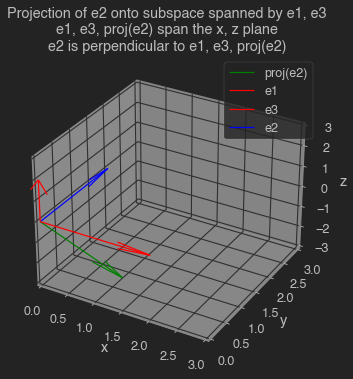

In [22]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
scale3D = 3
ax.set_xlim3d(0,scale3D)
ax.set_ylim3d(0, scale3D)
ax.set_zlim3d(-scale3D,scale3D)
origin  = np.array([0, 0, 0])
ax.grid(True)
# Figure setup.
ax.quiver(*origin, *projection, length=3, color='green', label='proj(e2)')
ax.quiver(*origin,*e1, length=2,color='red', label='e1')
ax.quiver(*origin,*e3, length=2,color='red', label='e3')
ax.quiver(*origin,*e2, length=2,color='blue', label='e2')
plt.title('Projection of e2 onto subspace spanned by e1, e3\ne1, e3, proj(e2) span the x, z plane\ne2 is perpendicular to e1, e3, proj(e2)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

https://math.stackexchange.com/questions/1510769/difference-between-epimorphism-isomorphism-endomorphism-and-automorphism-with

For any algebraic structure, a homomorphism preserves the structure, and some types of homomorphisms are:

    Epimorphism: a homomorphism that is surjective (AKA onto)
    Monomorphism: a homomorphism that is injective (AKA one-to-one, 1-1, or univalent)
    Isomorphism: a homomorphism that is bijective (AKA 1-1 and onto); isomorphic objects are equivalent, but perhaps defined in different ways
    Endomorphism: a homomorphism from an object to itself
    Automorphism: a bijective endomorphism (an isomorphism from an object onto itself, essentially just a re-labeling of elements)


### 3.7
Let $V$ be a vector space and $\pi$ an endomorphism of $V$. 

a. Prove that $\pi$ is a projection if and only if $\mathsf{id}_V - \pi$ is a projection, where $\mathsf{id}_V$ is the identity endomorphims of $V$.

We define $\mathsf{id}_V : V$ &rarr; $V , \mathbf{x}$ &rarr; $\mathbf{x}$ as the identity mapping or identity automorphism in $V$ .

$\pi(V)$ &rarr; $V$ 

$\pi(a_1v_1 + \dots + a_nv_n)$ &rarr; $b_1v_1 + \dots + b_nv_n$

Looking for some matrix $\mathbf{M}$ such that $$\mathbf{M}\begin{bmatrix}
a_1  \\
\vdots \\
a_n \end{bmatrix} = \begin{bmatrix}
b_1  \\
\vdots \\
b_n \end{bmatrix}$$

b. Assume now that $\pi$ is a projection. Calculate $\mathsf{Im}(\mathsf{id}_V-\pi)$ and $\mathsf{ker}(\mathsf{id}_V - \pi)$ as a function of $\mathsf{Im}(\pi)$ and $\mathsf{ker}(\pi)$.

### 3.8
Using the Gram-Schmidt method, turn the basis $B = (\mathbf{b}_1, \mathbf{b}_2)$ of a two-dimensional subspace $U \subseteq \mathbb{R}^3$ inot an ONB *orthonormal basis* $C = (\mathbf{c}_1, \mathbf{c}_2)$ of $U$, where $$ \mathbf{b}_1 := \begin{bmatrix}
1 \\
1 \\
1 \end{bmatrix}, \mathbf{b}_2 := \begin{bmatrix}
-1 \\
2 \\
0 \end{bmatrix}$$ 

In [23]:
# create basis b1 b2 of B
b1 = np.array([1, 1, 1]).reshape(3,1)
b2 = np.array([-1, 2, 0]).reshape(3, 1)

# create orthogonal basis using gram-schmidt 
v1 = b1
proj_b2 = np.dot(b2.T, v1) / np.dot(v1.T, v1) * v1
v2 = b2 - proj_b2

# sanity check
print('inner product', np.round(np.dot(v1.T, v2), 2))
print('unit length v1', np.round(np.dot(v1.T, v1), 2))
print('unit length v2', np.round(np.dot(v2.T, v2), 2))

inner product [[0.]]
unit length v1 [[3]]
unit length v2 [[4.67]]


In [24]:
# make the basis orthonormal
c1 = v1 / np.sqrt(np.dot(v1.T, v1))
c2 = v2 / np.sqrt(np.dot(v2.T, v2))

# sanity check
print('inner product', np.round(np.dot(c1.T, c2), 2))
print('unit length v1', np.round(np.dot(c1.T, c1), 2))
print('unit length v2', np.round(np.dot(c2.T, c2), 2))

inner product [[0.]]
unit length v1 [[1.]]
unit length v2 [[1.]]


In [25]:
print('c1\n', c1)
print('c2\n,', c2)

c1
 [[0.57735027]
 [0.57735027]
 [0.57735027]]
c2
, [[-0.6172134 ]
 [ 0.77151675]
 [-0.15430335]]


<ipython-input-27-a603e31eb7a4>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


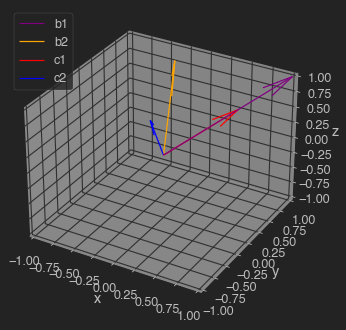

In [27]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
scale3D = 1
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(-scale3D, scale3D)
ax.set_zlim3d(-scale3D,scale3D)
origin  = np.array([0, 0, 0])
ax.grid(True)
# Figure setup.
ax.quiver(*origin,*b1, length=1,color='purple', label='b1', arrow_length_ratio=0.2)
ax.quiver(*origin,*b2, length=1,color='orange', label='b2')
ax.quiver(*origin,*c1, length=1,color='red', label='c1')
ax.quiver(*origin,*c2, length=1,color='blue', label='c2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend(loc='upper left')
plt.show()


### 3.9
Let $n \in \mathbb{N}$ and let $x_1, \dots, x_n > 0$ be $n$ positive real numbers so that $x_1 + \dots + x_n = 1 $. Use the Cauchy-Schwarz inequality and show that 

a. $\sum_{i=1}^n x_i^2 \ge \frac{1}{n}$


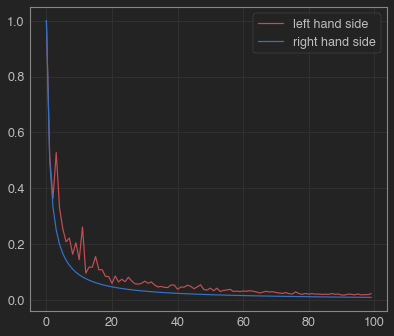

In [68]:
# Just a quick exploration
values_of_n = np.linspace(1, 100, 100, dtype=int)
lhs_dict = {}
rhs_dict = {}
for n in values_of_n:
    # https://stackoverflow.com/questions/18659858/generating-a-list-of-random-numbers-summing-to-1
    x = np.random.dirichlet(np.ones(n), size=1).reshape(n, 1)
    lhs=0
    rhs=1/n
    for i in x:
        val = i**2
        lhs += val
    #print("n", n)
    #print(lhs, " >= ", rhs)
    lhs_dict[n] = lhs
    rhs_dict[n] = rhs
    #print()
plt.plot(lhs_dict.values(), c='r', label='left hand side')
plt.plot(rhs_dict.values(), c='b', label='right hand side')
plt.legend()
plt.show()

$||x||^2 ||y||^2 \ge \langle x, y \rangle^2$, where we let $y$ is a vector of 1's length $n$


$ (x_1^2 + x_2^2 + \dots + x_n^2)(y_1^2 + y_2^2 + \dots + y_n^2) \ge  (x_1y_1 + x_2y_2 + \dots + x_ny_n) $

$ (x_1^2 + x_2^2 + \dots + x_n^2) \ge  \frac{(x_1y_1 + x_2y_2 + \dots + x_ny_n)}{(y_1^2 + y_2^2 + \dots + y_n^2)} $

$\sum_{i=1}^n x_i^2 \ge \frac{(1x_1 + 1x_2 + \dots + 1x_n)}{(1^2 + 1^2 + \dots + 1^2)} $

since we know $y$ is a vector 1s of length n, they sum to n. And since we know the $\sum_{i=1}^n$ x's = 1:

$\sum_{i=1}^n x_i^2 \ge \frac{1}{n} $


b. $\sum_{i=1}^n \frac{1}{x_i} \ge n^2$

The Cauchy-Scharz inequality can be expressed in this form(https://math.stackexchange.com/questions/1373594/cauchy-schwarz-inequality-problem):

$\sum_{i=1}^n \frac{y_i^2}{x^i} \ge \frac{(\sum_{i=1}^ny_i)^2}{\sum_{i=1}^nx_i}$ 

Letting y be the same as in problem (a) proves the inequality



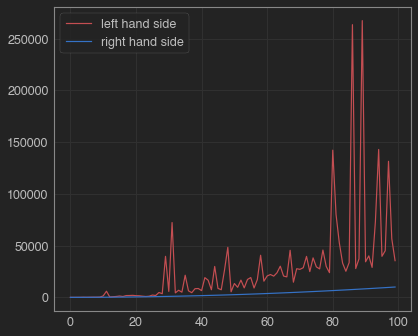

In [63]:
# Just a quick exploration part deux 
values_of_n = np.linspace(1, 100, 100, dtype=int)
lhs_dict = {}
rhs_dict = {}
for n in values_of_n:
    # https://stackoverflow.com/questions/18659858/generating-a-list-of-random-numbers-summing-to-1
    x = np.random.dirichlet(np.ones(n), size=1).reshape(n, 1)
    lhs=0
    rhs=n**2
    for i in x:
        val = 1/i
        lhs += val
    #print("n", n)
    #print(lhs, " >= ", rhs)
    lhs_dict[n] = lhs
    rhs_dict[n] = rhs
    #print()
plt.plot(lhs_dict.values(), c='r', label='left hand side')
plt.plot(rhs_dict.values(), c='b', label='right hand side')
plt.legend()
plt.show()

### 3.10

Rotate the vectors $$ \mathbf{x}_1:=\begin{bmatrix}
2 \\
3 \end{bmatrix}, \mathbf{x}_2:=\begin{bmatrix}
0 \\
-1 \end{bmatrix}$$ by 30&deg;

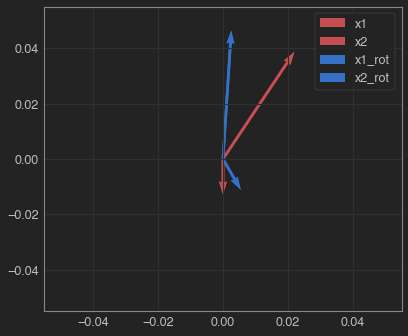

In [28]:
x1 = np.array([2, 3]).reshape(2, 1)
x2 = np.array([0, -1]).reshape(2, 1)

def get_2Drotation_matrix(angle):
    """returns a rotation matrix to rotate any vector in 2D about the origin"""
    theta = angle * math.pi / 180
    return np.array([[math.cos(theta), -1*math.sin(theta)],[math.sin(theta), math.cos(theta)]])

rot = get_2Drotation_matrix(30)
x1_rot = np.dot(rot, x1)
x2_rot = np.dot(rot, x2)
#plot vectors
origin = ([[0, 0], [0, 0]])
plt.quiver(*origin, *x1, color=['r'], scale=10, label='x1')
plt.quiver(*origin, *x2, color='r', scale=10, label='x2')
plt.quiver(*origin, *x1_rot, color=['b'], scale=10, label='x1_rot')
plt.quiver(*origin, *x2_rot, color='b', scale=10, label='x2_rot')
#plt.annotate("{:.2f} degrees".format(degrees), xy=[-.025, 0.015])
plt.legend()
plt.show()